# Sentiment Analysis — Solutions

In this lesson, we're going to learn how to use [VADER](https://github.com/cjhutto/vaderSentiment), an English-language sentiment analysis tool designed for use with social media texts. This tool helps to calculate whether texts express positive or negative sentiment.

## Install and Import Libraries/Packages

Then we will import the `SentimentIntensityAnalyser` and initialize it.

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

We are also going to import pandas for working with data and set the column width for pandas DataFrames to 400.

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 400

## Calculate Sentiment Scores

To calculate sentiment scores for a sentence or paragraph, we can use `sentimentAnalyser.polarity_scores()` and input a string of text.

This method returns a Python dictionary of sentiment scores: how negative the sentence is between 0-1, how neutral the sentence is between 0-1, how positive the sentence is between 0-1, as well as a compound score between -1-1.

Most scholars uses the compound score to represent sentiment in their analyses, and we will use the compound score in this lesson, as well. Let's test it out with some sample sentences! 

In [3]:
sentimentAnalyser.polarity_scores("The ref made the call. The goalie was fired up.")

{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5574}

In [ ]:
sentimentAnalyser.polarity_scores("Prejudice is awful.")

## Make a Function

Make a function that will accept any text and then return just the compound sentiment score for that text

In [6]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    
    # Extract the compound score
    
    # Return compound score
    return scores['compound']

Test it out!

In [7]:
calculate_sentiment('Prejudice is awful.')

-0.743

## Calculate Sentiment Scores for Donald Trump's Tweets

Let's try using VADER on many texts: Donald Trump's corpus of tweets from 2009 to 2021 (when he was suspended from Twitter).

We will load the Trump tweets CSV file with pandas

In [8]:
trump_df = pd.read_csv('Trump-Tweets.csv', parse_dates=['date'])

To calculate the sentiment for each tweet in the CSV file and add a new column that contains this information, we will apply a function that will take in any text and output the compound sentiment score.

Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"


In [9]:
trump_df['sentiment_score'] = trump_df['text'].apply(calculate_sentiment)

Let's sort the DataFrame and examine the top 10 tweets with the highest compound sentiment.

In [10]:
trump_df.sort_values(by='sentiment_score', ascending=False)

,text,favorites,retweets,date,sentiment_score
23169,"Congratulations to Patrick Reed on his great and courageous MASTERS win! When Patrick had his amazing win at Doral 5 years ago, people saw his great talent, and a bright future ahead. Now he is the Masters Champion!",79374,10122,2018-04-09 00:43:00,0.9899
5169,"Today, it was my great honor to proudly accept the endorsement of the @NYCPBA! I have deeply and profoundly admired the brave men and women of the #NYPD for my entire life. New York’s Finest are truly the best of the best — I will NEVER let you down! #MAGA https://t.co/o1l5kAx34v",86425,22183,2020-08-15 03:59:00,0.9879
7200,"I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back his original stance on honoring our magnificent American Flag. OLD GLORY is to be revered, cherished, and flown high...",267196,48513,2020-06-05 20:08:00,0.9879
2490,"It was great to be back in North Carolina with thousands of loyal, hardworking American Patriots! This election is a simple choice: If Biden Wins, China Wins. When WE Win, YOU WIN, North Carolina WINS, and America WINS! https://t.co/jWYVYZdT3E",46024,10955,2020-10-15 19:20:00,0.9876
11615,"95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!",110818,23498,2020-01-26 16:24:00,0.9869
...,...,...,...,...,...
21818,"The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!",66924,15264,2018-08-15 14:08:00,-0.9785
7096,"Colin Powell was a pathetic interview today on Fake News CNN. In his time, he was weak &amp; gave away everything to everybody - so bad for the USA. Also got the “weapons of mass destruction” totally wrong, and you know what that mistake cost us? Sad! Only negative questions asked.",127934,28175,2020-06-08 03:42:00,-0.9800
1552,"Our prayers are with the people of Vienna after yet another vile act of terrorism in Europe. These evil attacks against innocent people must stop. The U.S. stands with Austria, France, and all of Europe in the fight against terrorists, including radical Islamic terrorists.",236684,39564,2020-11-03 04:25:00,-0.9810
21749,"It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!",89183,23153,2018-08-20 17:14:00,-0.9825


How well do you think VADER is working on Trump's tweets? What patterns do you notice in these most positive tweets?

Let's sort the DataFrame and examine the 10 tweets with the lowest compound sentiment.

In [11]:
trump_df.sort_values(by='sentiment_score', ascending=True)

,text,favorites,retweets,date,sentiment_score
3728,"According to press reports, Iran may be planning an assassination, or other attack, against the United States in retaliation for the killing of terrorist leader Soleimani, which was carried out for his planning a future attack, murdering U.S. Troops, and the death &amp; suffering...",120885,32175,2020-09-15 03:04:00,-0.9829
21749,"It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!",89183,23153,2018-08-20 17:14:00,-0.9825
1552,"Our prayers are with the people of Vienna after yet another vile act of terrorism in Europe. These evil attacks against innocent people must stop. The U.S. stands with Austria, France, and all of Europe in the fight against terrorists, including radical Islamic terrorists.",236684,39564,2020-11-03 04:25:00,-0.9810
7096,"Colin Powell was a pathetic interview today on Fake News CNN. In his time, he was weak &amp; gave away everything to everybody - so bad for the USA. Also got the “weapons of mass destruction” totally wrong, and you know what that mistake cost us? Sad! Only negative questions asked.",127934,28175,2020-06-08 03:42:00,-0.9800
21818,"The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!",66924,15264,2018-08-15 14:08:00,-0.9785
...,...,...,...,...,...
11615,"95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!",110818,23498,2020-01-26 16:24:00,0.9869
2490,"It was great to be back in North Carolina with thousands of loyal, hardworking American Patriots! This election is a simple choice: If Biden Wins, China Wins. When WE Win, YOU WIN, North Carolina WINS, and America WINS! https://t.co/jWYVYZdT3E",46024,10955,2020-10-15 19:20:00,0.9876
7200,"I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back his original stance on honoring our magnificent American Flag. OLD GLORY is to be revered, cherished, and flown high...",267196,48513,2020-06-05 20:08:00,0.9879
5169,"Today, it was my great honor to proudly accept the endorsement of the @NYCPBA! I have deeply and profoundly admired the brave men and women of the #NYPD for my entire life. New York’s Finest are truly the best of the best — I will NEVER let you down! #MAGA https://t.co/o1l5kAx34v",86425,22183,2020-08-15 03:59:00,0.9879


### Plot Sentiment Over Time

We can plot how Trump's sentiment in his tweets fluctuates over time by making the date column the index of the DataFrame, which makes it easier to work with time series data.

In [12]:
trump_df = trump_df.set_index('date')

Then we will group the tweets by month using `.resample()`, a special method for datetime indices, and calculate the average (`.mean()`) compound score for each month. Finally, we will plot these averages.

<AxesSubplot:title={'center':"Trump's Tweet Sentiment by Month"}, xlabel='date'>

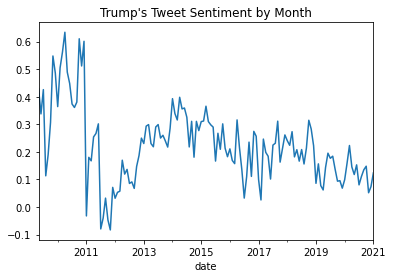

In [13]:
trump_df.resample('M')['sentiment_score'].mean().plot(title="Trump's Tweet Sentiment by Month")

By using `.loc`, we can also zoom in on particular time periods, such as the year 2020.

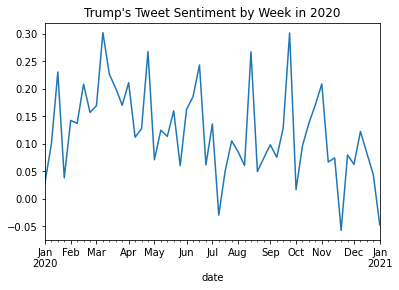

In [14]:
trump_df.loc["2020"].resample('W')['sentiment_score'].mean().plot(title="Trump's Tweet Sentiment by Week in 2020");

## Zoom In and Explore

In [15]:
trump_df.loc["2020"]

,text,favorites,retweets,sentiment_score
date,,,,
2020-12-31 18:52:00,https://t.co/2kYtZF8Mei,237668,57422,0.0000
2020-12-31 01:13:00,https://t.co/S6fKpzoXZZ,175185,47501,0.0000
2020-12-30 21:51:00,We now have far more votes than needed to flip Georgia in the Presidential race. Massive VOTER FRAUD took place. Thank you to the Georgia Legislature for today’s revealing meeting!,348110,85675,-0.5147
2020-12-30 21:38:00,".@BrianKempGA, his puppet Lt. Governor @GeoffDuncanGA, and Secretary of State, are disasters for Georgia. Won’t let professionals get anywhere near Fulton County for signature verifications, or anything else. They are virtually controlled by @staceyabrams &amp; the Democrats. Fools!",172187,46133,-0.7959
2020-12-30 21:27:00,Watching @FoxNews is almost as bad as watching Fake News @CNN. New alternatives are developing!,265625,49692,-0.7659
...,...,...,...,...
2020-01-01 00:15:00,"RT @heatherjones333: 🔥🔥🔥🔥🔥Lindsey Graham: Trump Has World on Notice, ‘There Will Be No Benghazis on His Watch’ https://t.co/4yfHKlZlV9",0,6631,-0.8689
2020-01-01 00:14:00,RT @heatherjones333: Congratulations Sleepy Joe! You just won Stupid Person of 2019 Award! 🏆Joe Biden: ‘We’re All Dead’ if We Don’t Stop...,0,7133,0.7955
2020-01-01 00:14:00,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE IS A GOOD THINGPutin Calls Trump To Thank Him For Helping Russia Thwart Terrorist Attack h...,0,8034,0.4526


- How well do you think VADER sentiment analysis works with tweets?
- What do you think VADER is really measuring?
- Could you imagine using sentiment analysis in a project? If so, how?